## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [1]:
# 0.1 Importar pandas para leer los dataframes
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)

In [2]:
# 0.2 Leer el dataframe
df_amz = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df_amz.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'amz_uk_price_prediction_dataset.csv'

In [108]:
# Ver total columnas y filas del dataframe
df_amz.shape

(2443651, 9)

In [109]:
# Ver los tipos de cada columna del dataframe
df_amz.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [110]:
# 1.1 - Generate a frequency table for the product `category`.
values_per_category = df_amz["category"].value_counts()
proportion_table = df_amz["category"].value_counts(normalize=True)
frecquency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

In [111]:
# Create a new df with categories counts
category_count = pd.crosstab(index = df_amz["category"],  # Make a crosstab
                             columns="count")      # Name the count column
category_count.sort_values(by="count", ascending=False)

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Motorbike Chassis,107
Plugs,107
Alexa Built-In Devices,107


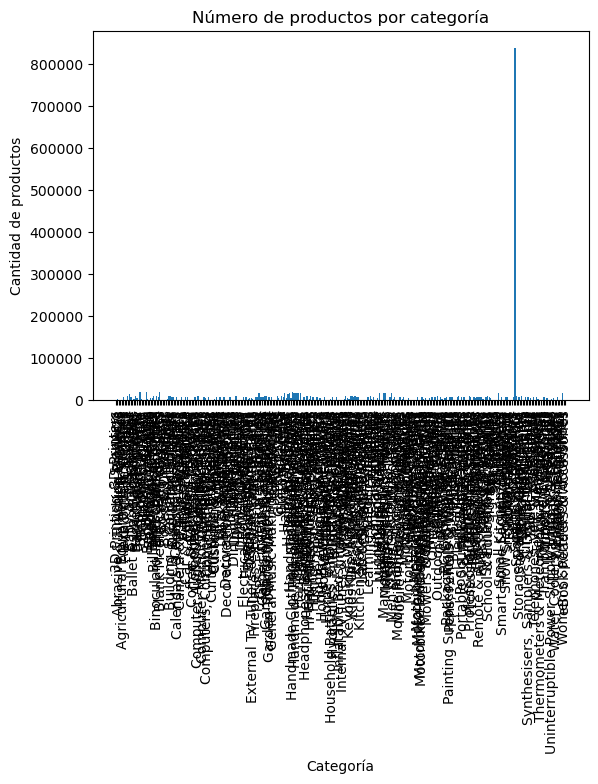

In [112]:
# Create the bar plot
plt.bar(category_count.index, category_count['count'])

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Cantidad de productos')
plt.title('Número de productos por categoría')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas si es necesario
plt.show()

/opt/anaconda3/envs/ironhack_labs/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


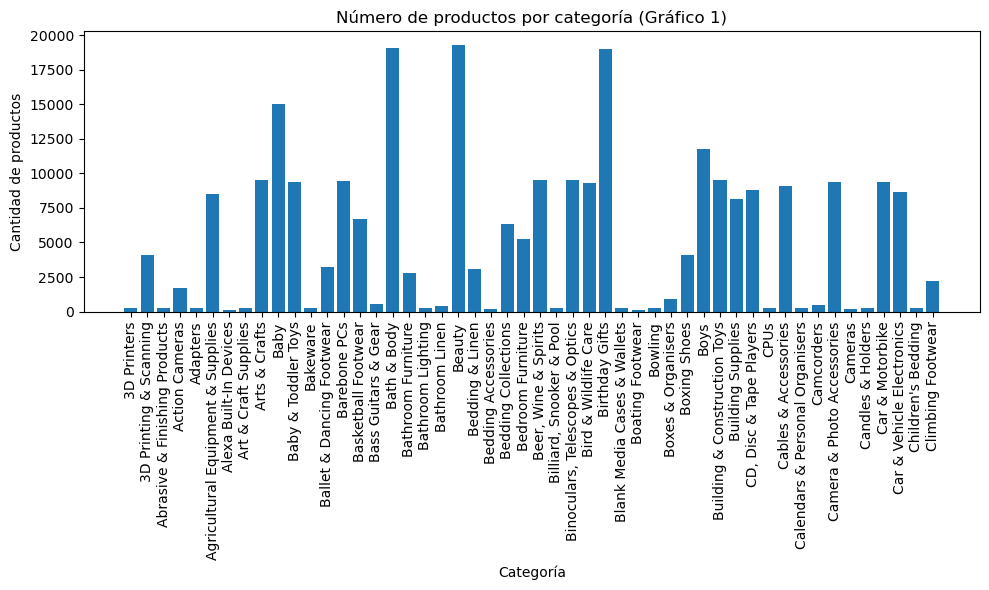

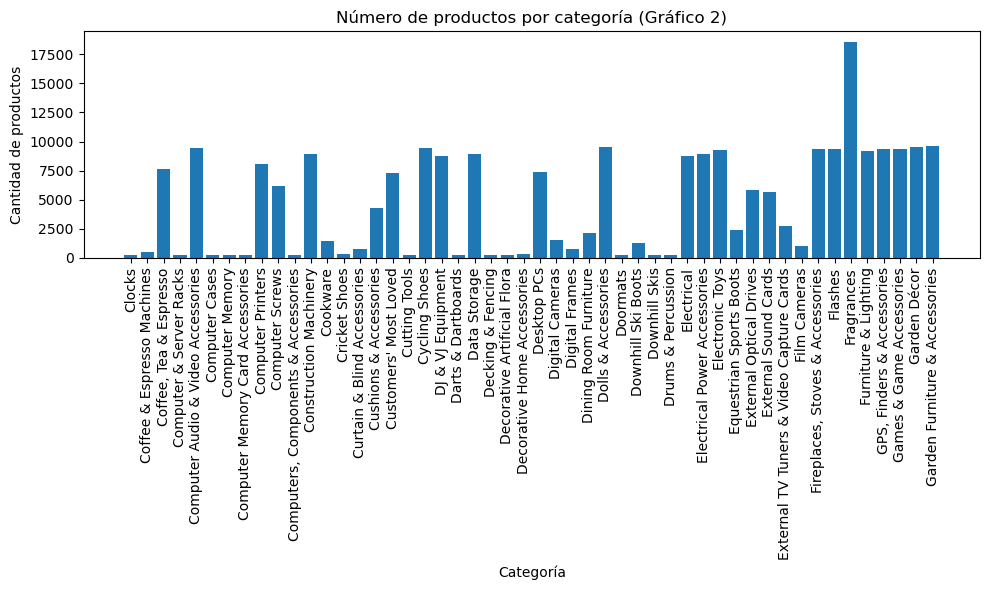

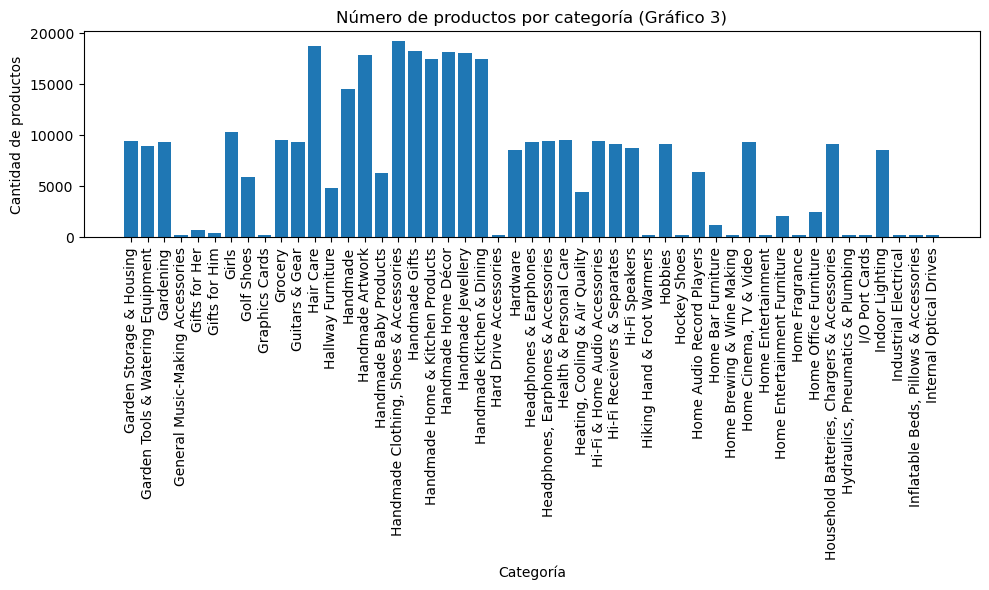

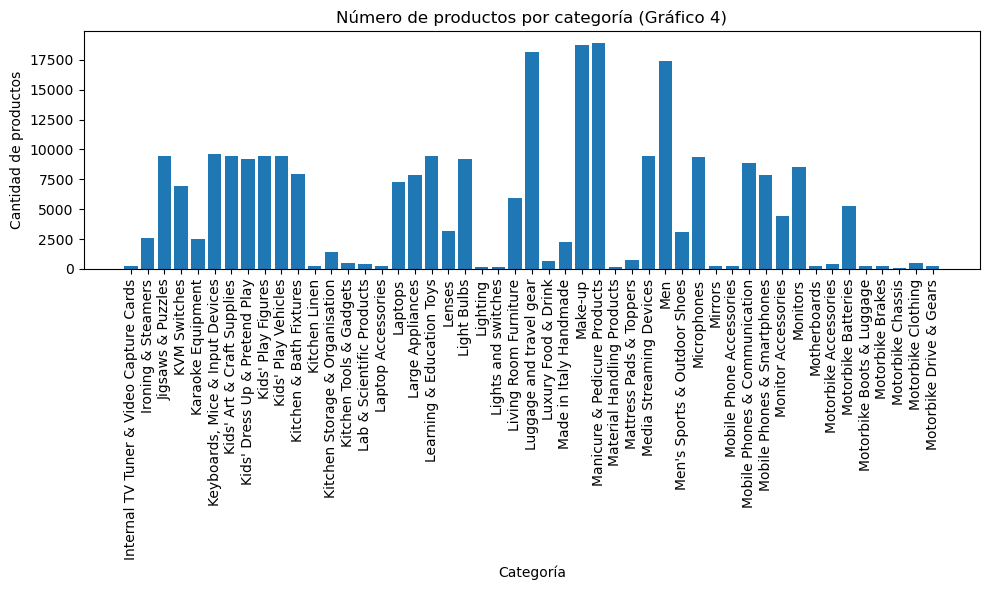

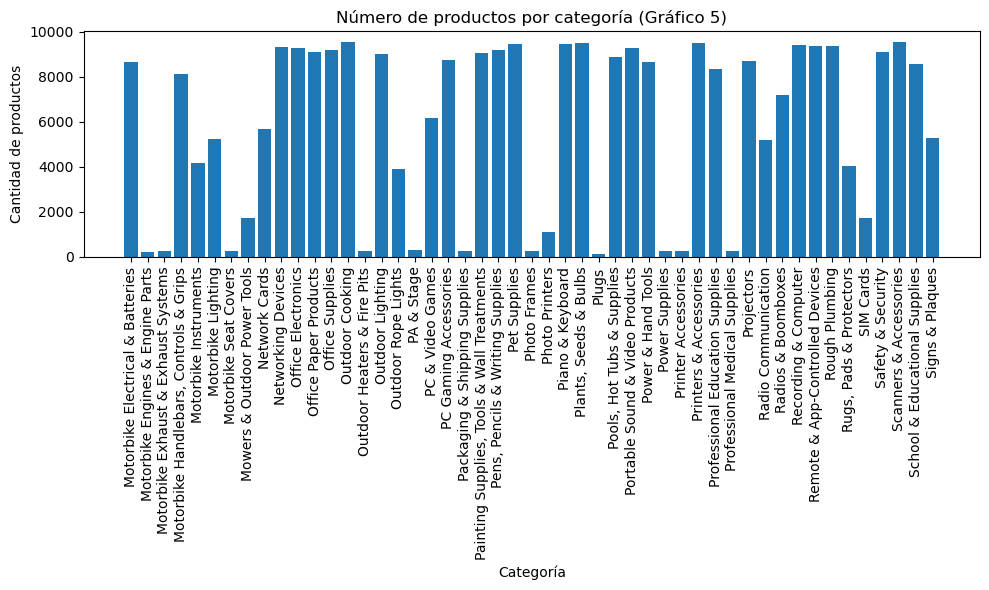

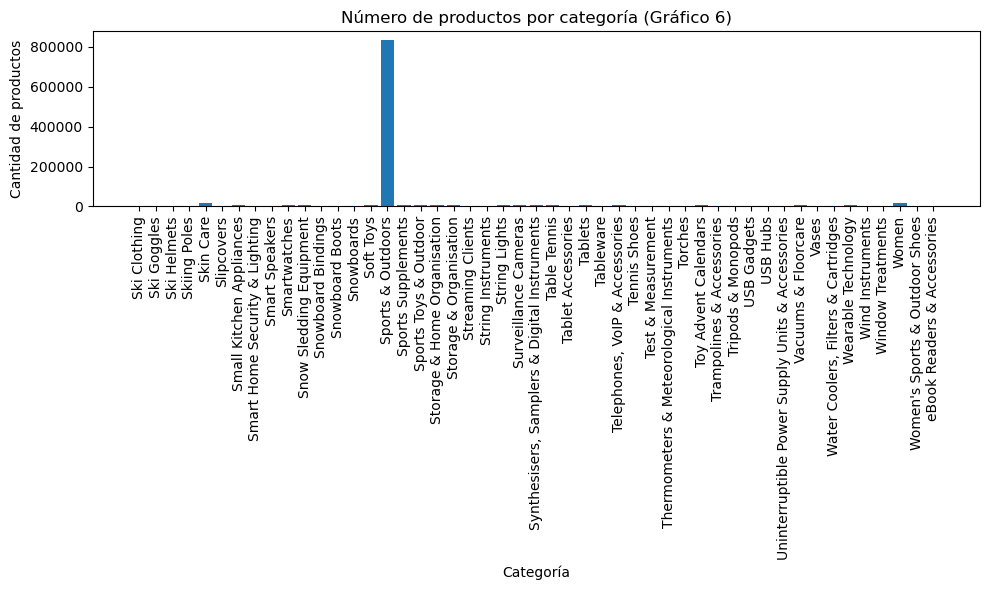

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que este es tu DataFrame con 296 filas
# category_count = DataFrame con columnas ['category', 'count']

# Paso 1: Dividimos el DataFrame en 6 partes
df_split = np.array_split(category_count, 6)

# Paso 2: Crear los barplots para cada subconjunto
for i, subset in enumerate(df_split):
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico
    plt.bar(subset.index, subset['count'])
    
    # Etiquetas y título
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de productos')
    plt.title(f'Número de productos por categoría (Gráfico {i+1})')
    
    # Ajustar las etiquetas del eje X
    plt.xticks(rotation=90)  # Rotar las etiquetas si es necesario
    plt.tight_layout()  # Asegurar que el gráfico no se superponga
    
    # Mostrar el gráfico
    plt.show()


In [114]:
# 1.2 - Which are the top 5 most listed product categories?
top5_most_listed_categories = conteo_categorias.sort_values(by="frecquency_table", ascending=False).head(5)

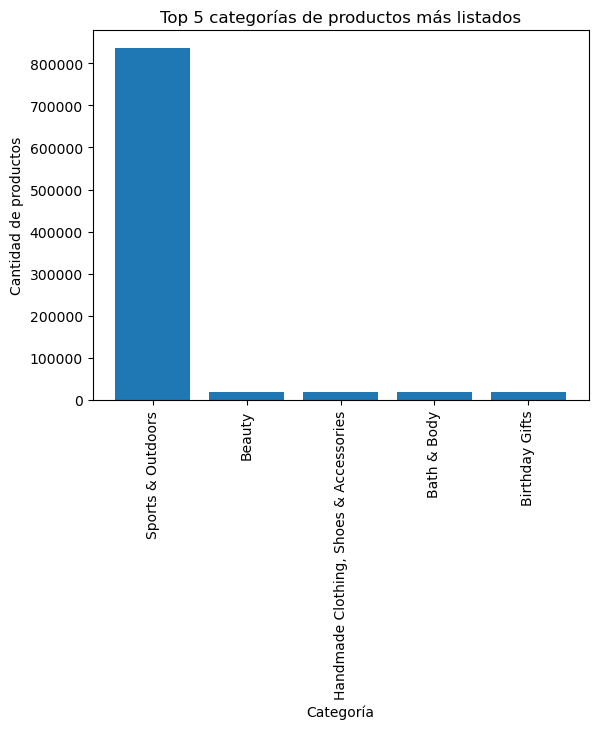

In [115]:
# Create the bar plot
plt.bar(top5_most_listed_categories.index, top5_most_listed_categories['frecquency_table'])

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Cantidad de productos')
plt.title('Top 5 categorías de productos más listados')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas si es necesario
plt.show()

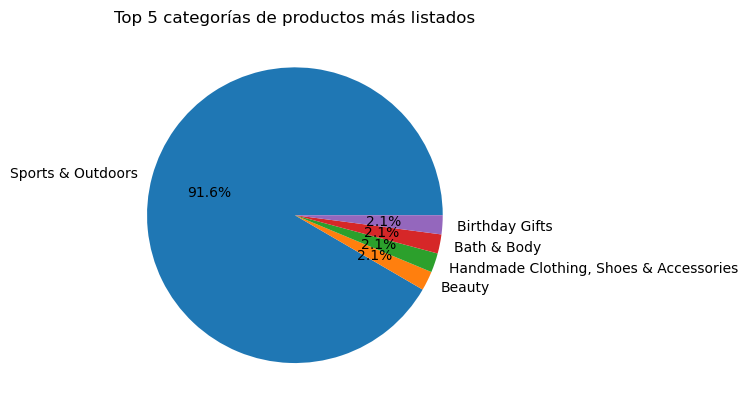

In [116]:
# Crear el gráfico de tarta
plt.pie(top5_most_listed_categories['frecquency_table'], 
        labels=top5_most_listed_categories.index, 
        autopct='%1.1f%%',  # Mostrar porcentajes en el gráfico
        startangle=0)  # Empezar el gráfico desde un ángulo de 90 grados

# Título
plt.title('Top 5 categorías de productos más listados')

# Mostrar el gráfico
plt.show()


### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [120]:
# Measures of Centrality
# Describe prices
df_amz.price.describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [121]:
# Calculate the mean, median, and mode for price products
mean_prices_amz = df_amz.mean()
median_prices_amz = df_amz.median()
mode_prices_amz = df_amz.mode()

print(f"For products in Amazon UK, the mean of prices is {mean_prices_amz}, median is {median_prices_amz} and mode is {mode_prices_amz}.")

